<a href="https://colab.research.google.com/github/taycurran/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/CURRAN_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Your Work Here

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(222)

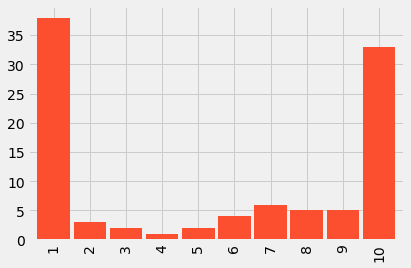

In [50]:
fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33],
                 index=range(1, 11))

fake.plot.bar(color='C1', width = 0.9)
plt.show()

In [0]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

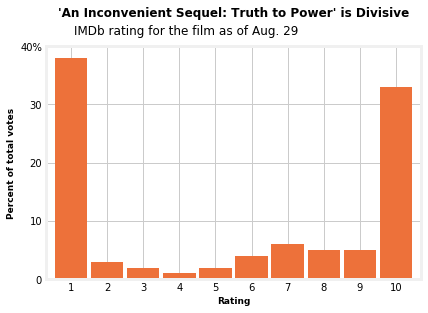

In [58]:
# set stylesheet
plt.style.use('fivethirtyeight')

# fig ax syntax
fig, ax = plt.subplots()

# figure background white
fig.patch.set(facecolor='white')

# put bars on the axes
fake.plot.bar(width=0.9, color='#ED713A')

#fake2.plot.bar(width=0.9, color='#ED713A')

# -? How does the cell know which fake to plot ?-

# set axes background color
ax.set(facecolor='white')

# set plot title
ax.set_title("'An Inconvenient Sequel: Truth to Power' is Divisive",
             fontsize=12, fontweight='bold', x=0.5, y=1.1)

# set plot ylabel
ax.set_ylabel('Percent of total votes', fontsize=9, fontweight='bold')

# now xlabel
ax.set_xlabel('Rating', fontsize=9, fontweight='bold')

# set subtitle
ax.text(s='IMDb rating for the film as of Aug. 29', y=42, x=0.1, fontsize=12)

# set y axis labels, tick marks and grid lines
ax.set_yticklabels(['0', '10', '20', '30', '40%'], fontsize=10)
ax.set_yticks(range(0, 50, 10))

# set x axis labels, tick marks and grid lines
ax.set_xticklabels(range(1, 11, 1), rotation='horizontal', fontsize=10)

# show the plot
fig.show()

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv")

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80053 entries, 0 to 80052
Data columns (total 27 columns):
timestamp      80053 non-null object
respondents    80053 non-null int64
category       80053 non-null object
link           80053 non-null object
average        80053 non-null float64
mean           80053 non-null float64
median         80053 non-null int64
1_votes        80053 non-null int64
2_votes        80053 non-null int64
3_votes        80053 non-null int64
4_votes        80053 non-null int64
5_votes        80053 non-null int64
6_votes        80053 non-null int64
7_votes        80053 non-null int64
8_votes        80053 non-null int64
9_votes        80053 non-null int64
10_votes       80053 non-null int64
1_pct          80053 non-null float64
2_pct          80053 non-null float64
3_pct          80053 non-null float64
4_pct          80053 non-null float64
5_pct          80053 non-null float64
6_pct          80053 non-null float64
7_pct          80053 non-null float64
8_pct 

In [65]:
df.head(1)

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6


In [0]:
# Convert timestamps stings to actual datetime objects
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [0]:
# Now we want to use the timestamp as the unique index identifier...
# so that we can select rows by timestamp
df.set_index('timestamp', inplace=True)

In [0]:
# Now we grab only the rows corresponding to the last day
lastday = df['2017-08-29']

In [67]:
# get the demographic breakdowns for all IMDb users on the last day
lastday_filtered = lastday[lastday['category'] == 'IMDb users']
lastday_filtered.tail()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 22:30:06.423181,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:40:06.233659,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:50:06.592571,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:00:05.829558,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [68]:
# to get the most up to date data we need to grab the very last line...
# or the latest timestamp

final = lastday_filtered.tail(1)
final.T

timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38
4_votes,25


In [69]:
# Now we want to grab only the percentage columns

pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']

final[pct_columns].T

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [70]:
# Now we want to reset the index so that it is numeric again.

plot_data = final[pct_columns].T
plot_data.index = range(1, 11)
plot_data.columns = ['percent']
plot_data

,percent
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


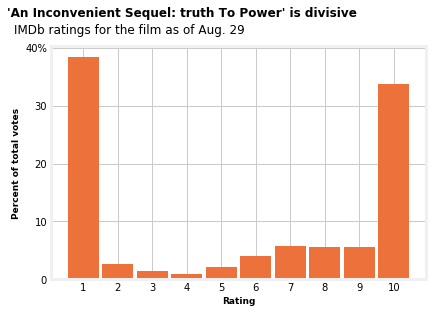

In [71]:
import matplotlib.pyplot as plt

# Set stylesheet
plt.style.use('fivethirtyeight')

# figure axes syntax
fig, ax = plt.subplots()

# Make the figure background color white
fig.patch.set(facecolor='white')

# put bars on the axes
#####
ax.bar(x=range(1,11), height=plot_data['percent'], width=0.9, color='#ED713A')

# Set axes background color
ax.set(facecolor='white')

# Set plot title
ax.set_title("'An Inconvenient Sequel: truth To Power' is divisive", fontsize=12, fontweight='bold', x=.35, y=1.1) 

# Set plot ylabel
ax.set_ylabel('Percent of total votes', fontsize=9, fontweight='bold')

# Set plot xlabel
ax.set_xlabel('Rating', fontsize=9, fontweight='bold')

# Set subtitle
ax.text(s='IMDb ratings for the film as of Aug. 29', y=42.5, x=-1, fontsize=12)

# set y axis labels, tick marks and grid lines
ax.set_yticklabels(['0', '10', '20', '30', '40%'], fontsize=10)
ax.set_yticks(range(0,50,10))

# Set x axis labels, tick marks and grid lines
ax.set_xticklabels(range(1,11,1), rotation='horizontal', fontsize=10, fontweight=550)
ax.set_xticks(range(1,11))

# Show the plot and squelch the funny output
fig.show()


### EXAMPLE:



In [0]:
deaths = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/terrorism/eu_terrorism_fatalities_by_country.csv')

In [75]:
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 13 columns):
iyear             45 non-null int64
Belgium           45 non-null int64
Denmark           45 non-null int64
France            45 non-null int64
Germany           45 non-null int64
Greece            45 non-null int64
Ireland           45 non-null int64
Italy             45 non-null int64
Luxembourg        45 non-null int64
Netherlands       45 non-null int64
Portugal          45 non-null int64
Spain             45 non-null int64
United Kingdom    45 non-null int64
dtypes: int64(13)
memory usage: 4.7 KB


In [77]:
deaths.head(1)

,iyear,Belgium,Denmark,France,Germany,Greece,Ireland,Italy,Luxembourg,Netherlands,Portugal,Spain,United Kingdom
0,1970,0,0,0,0,2,1,0,0,0,0,0,20


In [86]:
deaths.tail()

,iyear,Belgium,Denmark,France,Germany,Greece,Ireland,Italy,Luxembourg,Netherlands,Portugal,Spain,United Kingdom
40,2010,0,0,0,0,4,0,0,0,0,0,0,0
41,2011,0,0,0,2,0,1,0,0,0,0,0,1
42,2012,1,0,8,0,0,0,0,0,0,0,0,1
43,2013,0,0,0,0,2,0,0,0,0,0,0,4
44,2014,4,0,1,0,0,0,0,0,0,0,0,0


In [0]:
france_deaths = deaths['France']
euro_deaths = deaths.drop(['France'], axis=1)

In [80]:
euro_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 12 columns):
iyear             45 non-null int64
Belgium           45 non-null int64
Denmark           45 non-null int64
Germany           45 non-null int64
Greece            45 non-null int64
Ireland           45 non-null int64
Italy             45 non-null int64
Luxembourg        45 non-null int64
Netherlands       45 non-null int64
Portugal          45 non-null int64
Spain             45 non-null int64
United Kingdom    45 non-null int64
dtypes: int64(12)
memory usage: 4.3 KB


In [0]:
total_euro_deaths = euro_deaths.sum(axis=1) - euro_deaths['iyear']

In [0]:
assert len(france_deaths) == len(total_euro_deaths)

In [113]:
a = list(range(5))
a

[0, 1, 2, 3, 4]

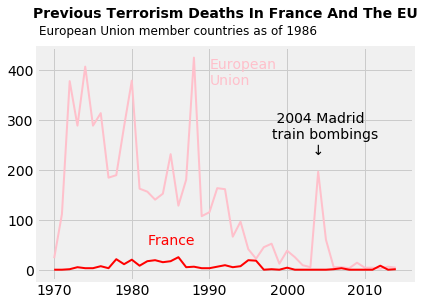

In [168]:
xs = list(range(1970, 2015))
y_eur = total_euro_deaths
y_fr = france_deaths

fig, ax = plt.subplots()

fig.patch.set(facecolor='white')

ax.plot(xs, y_eur, color='pink', linewidth=2)

# ax.fill_betweenx(xs, y_eur, y_fr)

ax.plot(xs, y_fr, color='red', linewidth=2)

ax.set_title('Previous Terrorism Deaths In France And The EU',
             fontsize=14, fontweight='bold', y=1.1)

#ax.text(s='European Union member countries as of 1986', x=.1, y=.1, fontsize=12)

#ax.set_xticklabels(["1970", "'75", "'80", "'85", "'90", "'95", "2000", "'05", "'10"],
#                   fontsize=9)

ax.text(1982, 50, 'France', color='red')

ax.text(1998, 230, ' 2004 Madrid \ntrain bombings \n         ↓')

ax.text(1990, 370, 'European\nUnion', color='pink')

ax.text(1968, 470, 'European Union member countries as of 1986', fontsize=12)

fig.show()

In [0]:
\

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here